
**1. Import Libraries**
First, we need to import the necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd  # for data manipulation
import numpy as np  # for numerical calculations
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for visualizing the data
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # for scaling the data
from sklearn.linear_model import LogisticRegression  # for Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # for model evaluation`

2. Load the Dataset
Download the dataset from Kaggle and load it into a pandas DataFrame.

In [ ]:
#importing the necessary module
from google.colab import files
#uploading the file
uploaded=files.upload()

Saving heart-disease.csv to heart-disease.csv


In [ ]:
import pandas as pd
#assuming the uploaded files is named 'salesData.xlsx'
file_name =list(uploaded.keys())[0]
data = pd.read_csv(file_name)
#display the fisrt few rows of the dataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


3. Exploratory Data Analysis (EDA)
Get an understanding of the dataset by looking at the structure and checking for missing values.

In [ ]:
# Check the structure and data types of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Get a summary of the statistics for numerical features
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
     

4. Data Visualization
Visualize key features to understand their relationships with the target variable (heart disease).

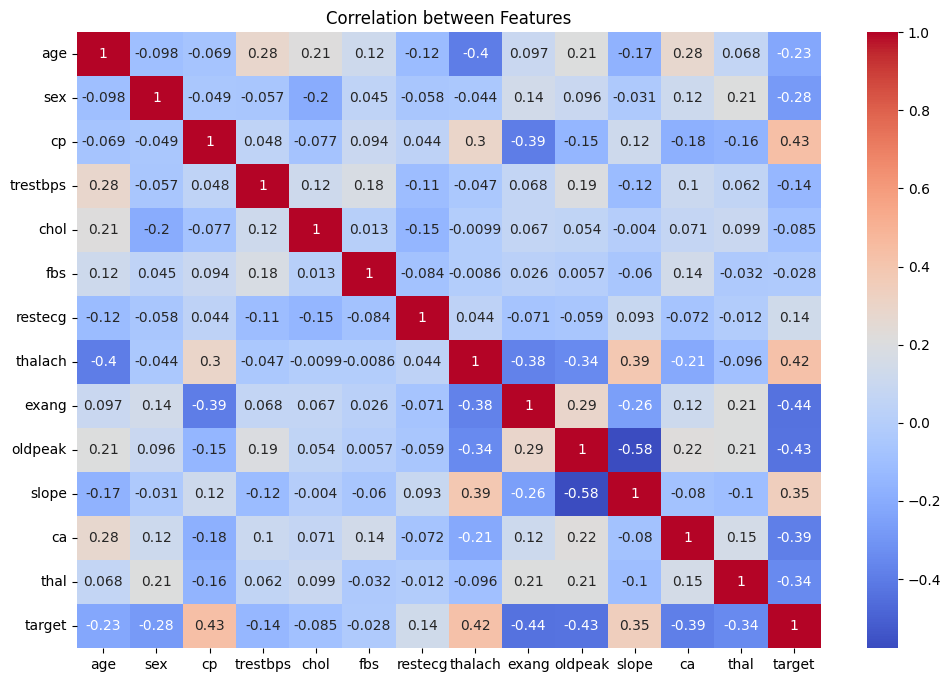

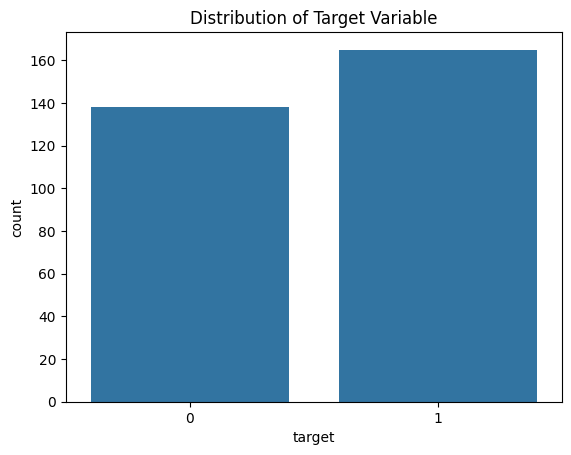

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

# Distribution of target variable (heart disease)
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


5. Data Preprocessing
Before training the model, we need to preprocess the data. This involves handling categorical variables, normalizing the features, and splitting the dataset into training and testing sets.

In [ ]:
# Splitting features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature variables using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


6. Train the Model
Let’s use a simple Logistic Regression model to predict heart disease.

In [ ]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)


LogisticRegression()

7. Model Prediction
After training the model, we can use it to predict heart disease on the test data.

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model’s performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 85.25%


8. Model Evaluation
To get a better understanding of the model’s performance, we’ll use a confusion matrix and a classification report.

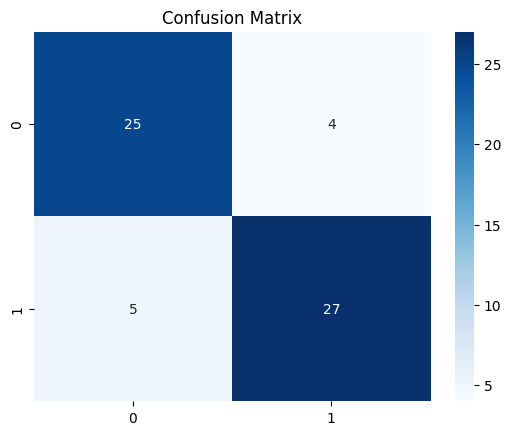

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


**user inputs**

In [ ]:
# Function to get user input for prediction
def get_user_input():
    age = int(input("Enter your age: "))
    sex = int(input("Enter your sex (1 = male, 0 = female): "))
    cp = int(input("Enter chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic): "))
    trestbps = int(input("Enter your resting blood pressure (in mm Hg): "))
    chol = int(input("Enter your cholesterol level (in mg/dl): "))
    fbs = int(input("Is fasting blood sugar > 120 mg/dl? (1 = yes, 0 = no): "))
    restecg = int(input("Resting ECG results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy): "))
    thalach = int(input("Enter maximum heart rate achieved: "))
    exang = int(input("Do you have exercise-induced angina? (1 = yes, 0 = no): "))
    oldpeak = float(input("Enter oldpeak (ST depression induced by exercise relative to rest): "))
    slope = int(input("Enter the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping): "))
    ca = int(input("Enter the number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Enter thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect): "))

    # Combine all inputs into a numpy array
    user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Create and fit a StandardScaler object (assuming 'X_train' is your training data)
    scaler = StandardScaler()
    scaler.fit(X_train) # Replace 'X_train' with your training data

    # Scale the input data using the trained scaler
    user_data_scaled = scaler.transform(user_data)

    return user_data_scaled


prediction on user inputs

In [ ]:
# Function to predict heart disease
def predict_heart_disease():
    user_data_scaled = get_user_input()  # Get and scale user input
    prediction = model.predict(user_data_scaled)  # Make the prediction

    if prediction == 1:
        print("The model predicts that you are likely to have heart disease.")
    else:
        print("The model predicts that you are not likely to have heart disease.")

# Call the prediction function
predict_heart_disease()


Enter your age: 56
Enter your sex (1 = male, 0 = female): 1
Enter chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic): 2
Enter your resting blood pressure (in mm Hg): 130
Enter your cholesterol level (in mg/dl): 221
Is fasting blood sugar > 120 mg/dl? (1 = yes, 0 = no): 0
Resting ECG results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy): 1
Enter maximum heart rate achieved: 163
Do you have exercise-induced angina? (1 = yes, 0 = no): 0
Enter oldpeak (ST depression induced by exercise relative to rest): 0
Enter the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping): 0
Enter the number of major vessels (0-3) colored by fluoroscopy: 3
Enter thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect): 1
The model predicts that you are likely to have heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
